In [ ]:
!pip install rdkit

# Molecular Fingerprints

In [2]:
import numpy as np
from collections import OrderedDict

import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
import rdkit.Chem.Draw as Draw
from rdkit.Chem.Draw import rdMolDraw2D

from IPython.display import SVG

## Load Caffeine Molecule from SMILES

In [3]:
smi = "Cn1c(=O)c2c(ncn2C)n(C)c1=O"
mol = Chem.MolFromSmiles(smi)

## Draw

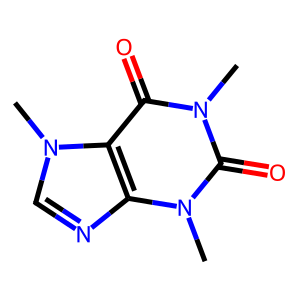

In [4]:
width, height = 300, 300
# Render high resolution molecule

drawer = rdMolDraw2D.MolDraw2DSVG(width, height)
opts = drawer.drawOptions()
opts.bondLineWidth = 5
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
SVG(svg)

## Morgan Fingerprint

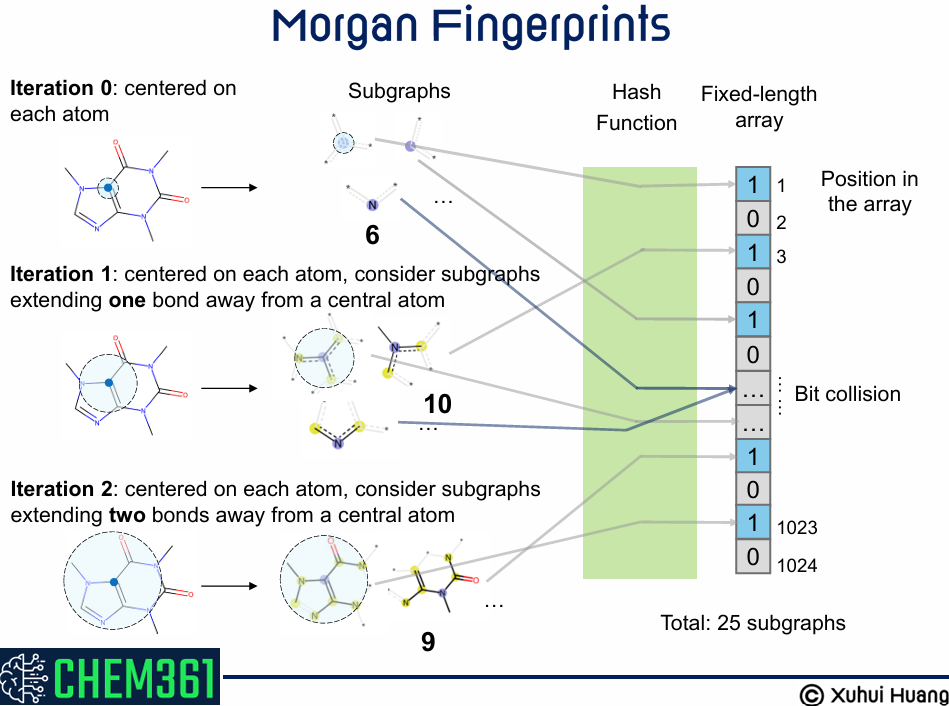

In [5]:
bi = {} # bit info
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bi)
print("Number of 1-bit:", np.sum(fp))

Number of 1-bit: 24


[08:42:15] DEPRECATION WARNING: please use MorganGenerator


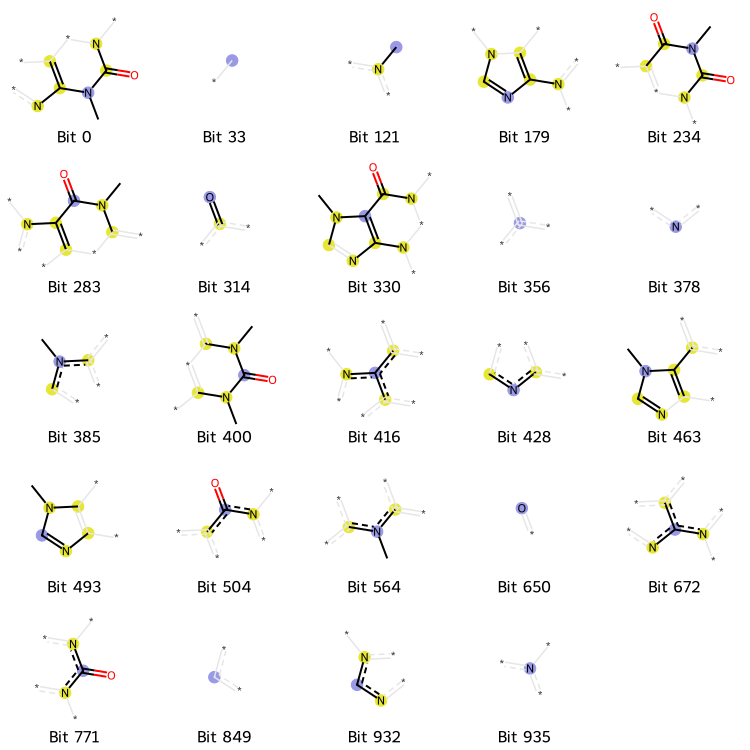

In [6]:
on_bits = [(mol, i, bi) for i in fp.GetOnBits()]
labels = [f"Bit {str(i[1])}" for i in on_bits]
Draw.DrawMorganBits(on_bits, molsPerRow=5, legends=labels)

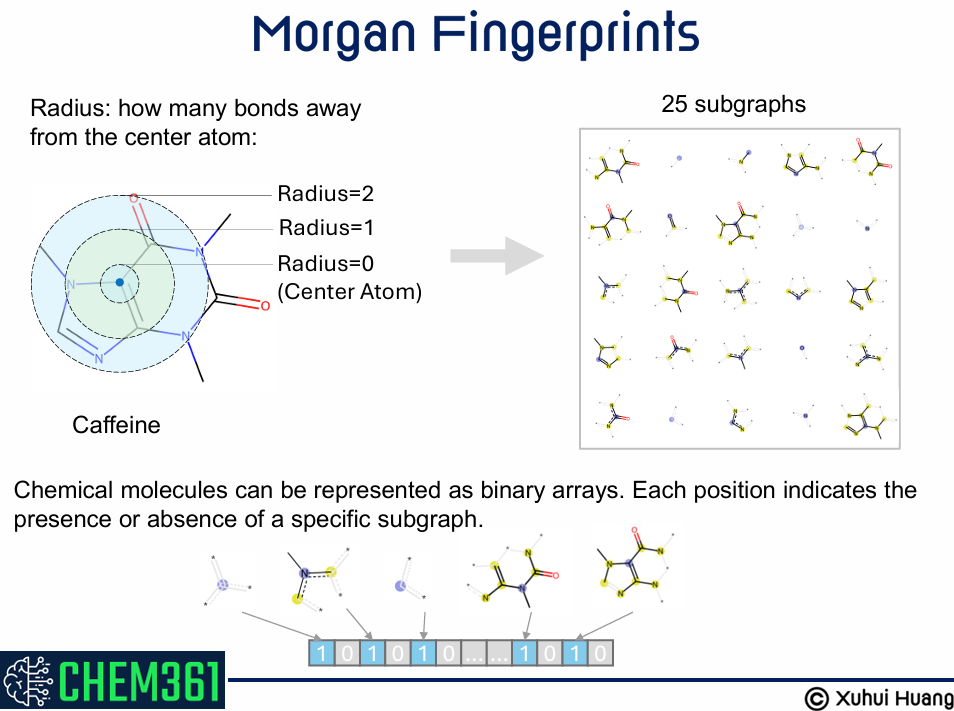

## Functional Group Fingerprint

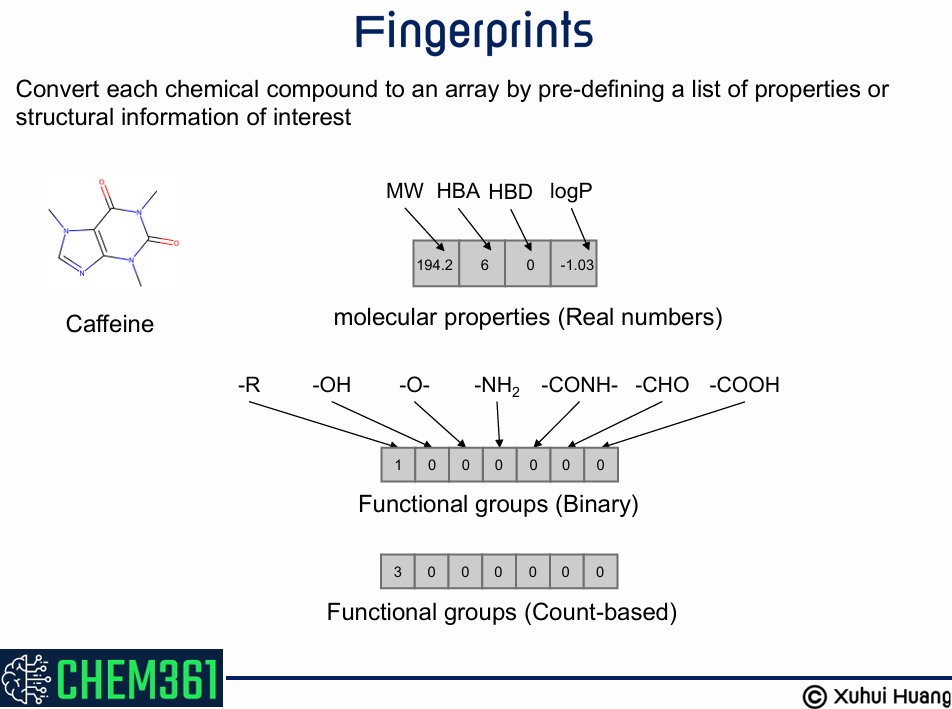

In [7]:
# predefine a few
PATTERNS = OrderedDict({
    "alkane": ["[CX4]"],
    "halogen": ["[$([F,Cl,Br,I]-!@[#6]);!$([F,Cl,Br,I]-!@C-!@[F,Cl,Br,I]);!$([F,Cl,Br,I]-[C,S](=[O,S,N]))]"],
    "alcohol": ["[O;H1;$(O-!@[#6;!$(C=!@[O,N,S])])]"],
    "ether": ["[OD2]([#6])[#6]"],
    "amine": ["[NX3;H2,H1;!$(NC=O)]"], # "[N;$(N-[#6]);!$(N-[!#6;!#1]);!$(N-C=[O,N,S])]"
    "amide": ["[NX3][CX3](=[OX1])[#6]"],
    "enamine": ["[NX3][CX3]=[CX3]"],
    "aldehyde": ["[CH;D2;!$(C-[!#6;!#1])]=O"],
    "ketone": ["[#6][CX3](=O)[#6]"],
    "carboxylic acids": ["[CX3](=O)[OX2H1]"],
})

In [8]:
def get_atomids_in_functional_group(mol, pat_strs):
    results = []

    for pat_str in pat_strs:
        pattern = Chem.MolFromSmarts(pat_str)
        matches = mol.GetSubstructMatches(pattern)
        if matches:
            results.extend(matches)
    return results

In [9]:
# binary
print("Binary functional-group fingerprint:")
for name, pattern_str in PATTERNS.items():
    pat_strs = PATTERNS[name]
    results = get_atomids_in_functional_group(mol, pat_strs)
    print(f"{name}: {1 if len(results) > 0 else 0}")

Binary functional-group fingerprint:
alkane: 1
halogen: 0
alcohol: 0
ether: 0
amine: 0
amide: 0
enamine: 0
aldehyde: 0
ketone: 0
carboxylic acids: 0


In [10]:
# count-based
print("Count-based functional-group fingerprint:")
for name, pattern_str in PATTERNS.items():
    pat_strs = PATTERNS[name]
    results = get_atomids_in_functional_group(mol, pat_strs)
    print(f"{name}: {len(results)}")

Count-based functional-group fingerprint:
alkane: 3
halogen: 0
alcohol: 0
ether: 0
amine: 0
amide: 0
enamine: 0
aldehyde: 0
ketone: 0
carboxylic acids: 0
